In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as sm
import sklearn.model_selection as ms

In [2]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from collections import Counter


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("correlation.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279037 entries, 0 to 279036
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      279037 non-null  int64  
 1   BMI               279037 non-null  float64
 2   Smoking           279037 non-null  int64  
 3   AlcoholDrinking   279037 non-null  int64  
 4   Stroke            279037 non-null  int64  
 5   PhysicalHealth    279037 non-null  int64  
 6   MentalHealth      279037 non-null  int64  
 7   DiffWalking       279037 non-null  int64  
 8   Sex               279037 non-null  int64  
 9   AgeCategory       279037 non-null  int64  
 10  Race              279037 non-null  int64  
 11  Diabetic          279037 non-null  int64  
 12  PhysicalActivity  279037 non-null  int64  
 13  GenHealth         279037 non-null  int64  
 14  SleepTime         279037 non-null  int64  
 15  Asthma            279037 non-null  int64  
 16  KidneyDisease     27

In [5]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,MAH_1,probability,PrimaryLast,pro
count,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,...,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.000000,279037.0,279037.000000
mean,0.075320,28.220438,0.412146,0.068052,0.014199,2.905439,3.758573,0.118242,0.526622,7.376534,...,0.781649,2.369783,7.067450,0.129230,0.012894,0.086759,14.853570,0.627150,1.0,0.627150
std,0.263907,6.095034,0.492222,0.251835,0.118310,7.199525,7.632058,0.322895,0.499292,3.586056,...,0.413128,0.997894,1.315324,0.335455,0.112819,0.281482,9.146219,0.368093,0.0,0.368093
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.381886,0.001000,1.0,0.001000
25%,0.000000,23.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,7.326851,0.271732,1.0,0.271732
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,...,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,12.675407,0.757630,1.0,0.757630
75%,0.000000,31.390000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,10.000000,...,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,20.048968,0.978908,1.0,0.978908
max,1.000000,64.560000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,13.000000,...,1.000000,5.000000,15.000000,1.000000,1.000000,1.000000,40.791398,0.999987,1.0,0.999987


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
!pip install plotly
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to tell Python to actually display the graphs
%matplotlib inline

# open-source Python graphing library for building beautiful, interactive visualizations, and showing exact numbers
!pip install plotly
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [8]:
X = df.drop(['HeartDisease', 'MAH_1', 'probability', 'PrimaryLast', 'pro'], axis=1)
y = df['HeartDisease']

In [9]:
# SMOTE to make the data balance 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [10]:
# number of examples after applying the algorithm
len(X_res)

516040

In [11]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0, 258020), (1, 258020)]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(361228, 17) (154812, 17)


In [13]:
df['HeartDisease'].value_counts()

0    258020
1     21017
Name: HeartDisease, dtype: int64

In [14]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (361228, 17)
Shape of test set :  (154812, 17)
Percentage of classes in training set:
1    0.500282
0    0.499718
Name: HeartDisease, dtype: float64
Percentage of classes in test set:
0    0.500659
1    0.499341
Name: HeartDisease, dtype: float64


In [15]:
##Percentage of classes in training set: * the follwoing result before applying SMOTE techniques 
0    0.924403 1    0.075597 
Name: HeartDisease, dtype: float64 means that in the training set, 92.44% of the samples belong to class 0 (no heart disease) 
and 7.56% belong to class 1 (heart disease).
Percentage of classes in test set: 
    0    0.925327 1    0.074673 
    Name: HeartDisease, dtype: float64 means that in the test set, 92.53% of the samples belong to class 0 (no heart disease) 
            and 7.47% belong to class 1 (heart disease).

SyntaxError: invalid syntax (1221419601.py, line 2)

In [16]:
#The training and test sets are both imbalanced because  * the foolowing conclusion before applying the SMOTE techniques  
the percentage of samples in each class is not equal. 
In this case, the majority class is “no heart disease”
and the minority class is “heart disease”. 
Imbalanced datasets can make it difficult 
to train machine learning models that accurately predict the minority class.

SyntaxError: invalid character '“' (U+201C) (3923744097.py, line 3)

In [17]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Command to tell Python to actually display the graphs
%matplotlib inline




ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [18]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [19]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [20]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

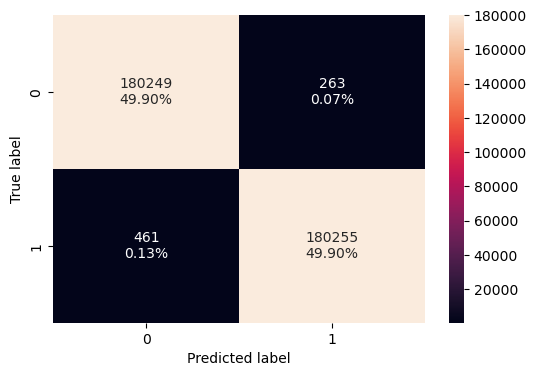

In [21]:
confusion_matrix_sklearn(model, X_train, y_train)


In [22]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.844883,0.873318,0.826005,0.849003


In [23]:
#In this case, The accuracy of your model is 0.997996, 
which means that it correctly classified 99.80% of the instances 
in the test set. The recall is 0.997449, which means that it 
correctly identified 99.74% of the actual positive instances in the test set.
The precision is 0.998543, which means that when it predicted a positive instance, it was correct 99.85% of the time. The F1 score is 0.997996, 
which is a weighted average of precision and recall.

SyntaxError: invalid syntax (163718332.py, line 2)

In [24]:
feature_names = list(X_train.columns)
print(feature_names)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [25]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

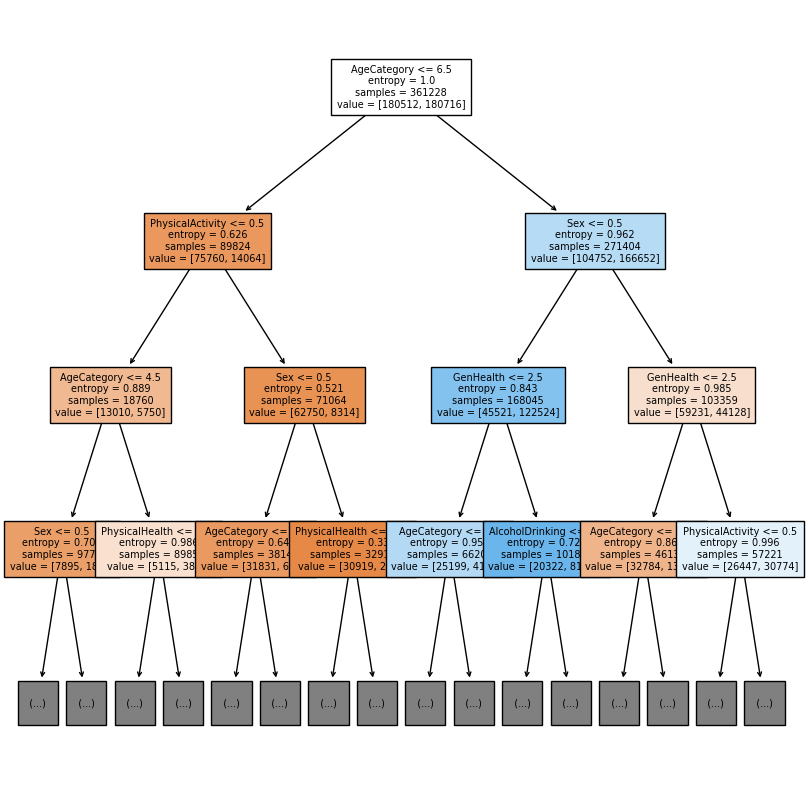

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=7,
    node_ids=False,
    class_names=None,
)

# Loop through each output element (tree node)
for o in out:
    arrow = o.arrow_patch  # Get the arrow_patch from the node
    if arrow is not None:
        arrow.set_edgecolor("black")  # Set arrow edge color to black
        arrow.set_linewidth(1)       # Set arrow linewidth

plt.show()



In [27]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- AgeCategory <= 6.50
|   |--- PhysicalActivity <= 0.50
|   |   |--- AgeCategory <= 4.50
|   |   |   |--- Sex <= 0.50
|   |   |   |   |--- SleepTime <= 5.50
|   |   |   |   |   |--- PhysicalHealth <= 5.50
|   |   |   |   |   |   |--- BMI <= 42.78
|   |   |   |   |   |   |   |--- MentalHealth <= 3.50
|   |   |   |   |   |   |   |   |--- AgeCategory <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [50.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- AgeCategory >  1.50
|   |   |   |   |   |   |   |   |   |--- Race <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 28.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- BMI >  28.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- Race >  1.50
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 19.48
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dep

In [28]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
BMI               0.343753
AgeCategory       0.187294
SleepTime         0.075729
PhysicalHealth    0.063727
MentalHealth      0.060886
Sex               0.055434
GenHealth         0.055323
Smoking           0.032383
Race              0.030418
PhysicalActivity  0.023949
Diabetic          0.020553
AlcoholDrinking   0.012637
DiffWalking       0.012580
Asthma            0.009744
SkinCancer        0.008101
Stroke            0.004643
KidneyDisease     0.002846


In [29]:
#In this case, BMI has the highest importance with a value of 0.343753 
followed by AgeCategory with a value of 0.187294.

SyntaxError: invalid syntax (3670266359.py, line 2)

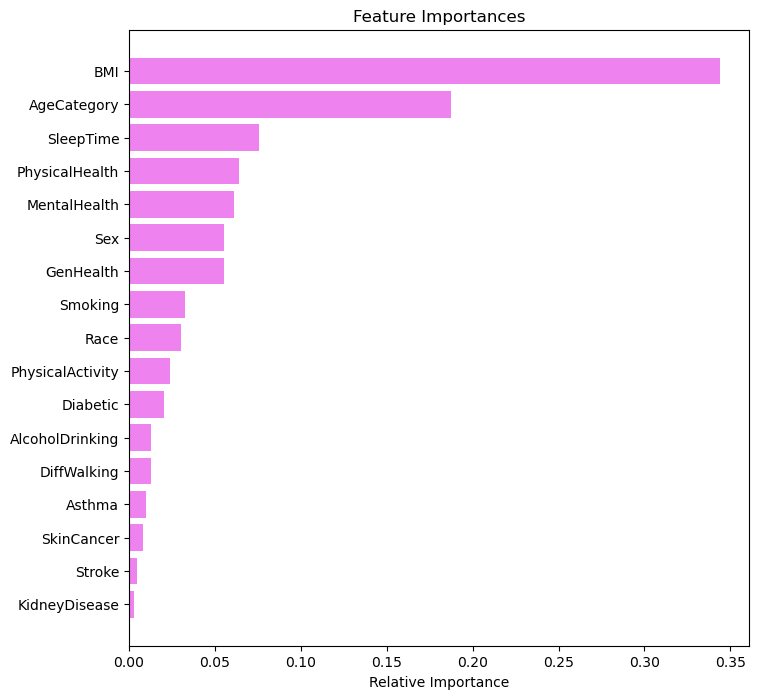

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()